In [5]:
import io
import sys
from datetime import datetime
from Chain.Manager import Manager
import random, numpy
import Chain.Consensus.BigFoot.BigFoot as BigFoot
import Chain.Consensus.PBFT.PBFT as PBFT
from Chain.Metrics import SimulationState, Metrics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Chain.Parameters import Parameters
import Chain.tools as tools
import seaborn as sns


In [22]:

# Set the seed for random number generation
seed = 5
random.seed(seed)
np.random.seed(seed)

def run1(Node=10, Validator=0.1, Protocol='BigFoot',type="broadcast", beta=0.5,faulty_nodes=0,num_byzantine=0):
    """
    Runs the simulation with the given parameters.

    Parameters:
    Node (int): The number of nodes in the simulation.
    Validator (float): The probability of a node being a validator.
    Protocol (str): The consensus protocol to use ('BigFoot' or 'PBFT').
    Runtime (int): The runtime of the simulation in seconds.

    Returns:
    None
    """

    # Create a Manager object and set up the simulation
    manager = Manager()
    tools.set_env_vars_from_config()
    Parameters.load_params_from_config()
    # Use the modify method to set the parameters
    manager.modify('Nn', Node)
    manager.modify('alpha', Validator)
    manager.modify('init_CP', Protocol)
    manager.modify('beta', beta)
    manager.modify('type', type)
    manager.modify('simTime', 1000)
    manager.modify('crash_probs', faulty_nodes)
    manager.modify('byzantine_nodes', num_byzantine)
    manager.set_up()


    # Start the simulation and measure the runtime
    t = datetime.now()
    print("Simulation started...")
    manager.run()
    runtime = datetime.now() - t
    print("Simulation finished.")
    # Open a text file for writing the report

    SimulationState.store_state(manager.sim)
    Metrics.measure_all(SimulationState.blockchain_state)

    # Redirect stdout to a string buffer, print the metrics, and then reset stdout
    old_stdout = sys.stdout
    sys.stdout = buffer = io.StringIO()
    Metrics.print_metrics()
    sys.stdout = old_stdout
        # Get the metrics results
    metrics_result = Metrics.metrics_result()
    
    # Add the parameters to the metrics result dictionary
    metrics_result.update({
        "Node": Node,
        "Validator": Validator,
        "Protocol": Protocol,
        "Type": type1,
        "Beta": beta,
        "Faulty Nodes": faulty_nodes,
        "Num Byzantine": num_byzantine
    })

    return metrics_result
with open('metrics.txt', 'w') as f:
    f.write("--------------------")
    time=0;   
    # Run the simulation with different parameters and collect the results
    results = []
    for number_byzantine1 in [0,1]:
        for faulty_nodes1 in [0,1]:
            for type1 in ["broadcast","gossip"]:
                for Node1 in [6,9,12]:
                    for Validator1 in [1]:
                        for Protocol1 in ['PBFT', 'BigFoot']:
                            for Runtime1 in [100]:
                                time=time+1
                                f.write(f"time={time}\n")
                                f.write(f"Running simulation with Node={Node1}, Validator={Validator1}, Protocol={Protocol1}, Runtime={Runtime1}, type={type1}, beta=0.5, faulty_nodes={faulty_nodes1}, num_byzantine={number_byzantine1}\n")
                                f.flush()  # Flush the buffer
                                result = run1(Node=Node1, Validator=Validator1, Protocol=Protocol1,type=type1, beta=0.5,faulty_nodes=faulty_nodes1,num_byzantine=number_byzantine1)
                                results.append(result)
df = pd.DataFrame(results)

def plot_simulation_results(df):
    # Parameters for the x-axis
    x_params = ['Node', 'Validator', 'Protocol', 'Faulty Nodes', 'Type']  # Corrected column names
    # Metrics to plot on the y-axis
    y_metrics = ['Average Latency', 'Average Throughput']
    
    # Set the style of matplotlib to emulate ggsci style
    plt.style.use('ggplot')  # 'ggplot' style has a good scientific look
    sns.set_palette("colorblind")  # Color palette that is colorblind accessible

    # Create subplots
    fig, axs = plt.subplots(len(y_metrics), len(x_params), figsize=(20, 10))

    for i, metric in enumerate(y_metrics):
        for j, param in enumerate(x_params):
            sns.barplot(data=df, x=param, y=metric, ax=axs[i, j], capsize=.05)
            axs[i, j].set_title(f'{metric} over different {param}')
            axs[i, j].set_xlabel(param)
            axs[i, j].set_ylabel(metric)
            for item in axs[i, j].get_xticklabels():
                item.set_rotation(45)  # Rotate x labels for better readability

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Convert the results to a DataFrame with appropriate columns
df = pd.DataFrame(results)
# Make sure to include all parameters and metrics in the DataFrame
expected_columns = ['Node', 'Validator', 'Protocol', 'Type', 'Beta', 'Faulty Nodes', 'Num Byzantine', 
                    'Average Latency', 'Latency Variance', 'Average Throughput', 'Throughput Variance']
assert all(column in df.columns for column in expected_columns), "DataFrame is missing expected columns"

# Call the function to plot the results
plot_simulation_results(df)


Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation started...
Simulation finished.
Simulation 

ValueError: Sample larger than population or is negative

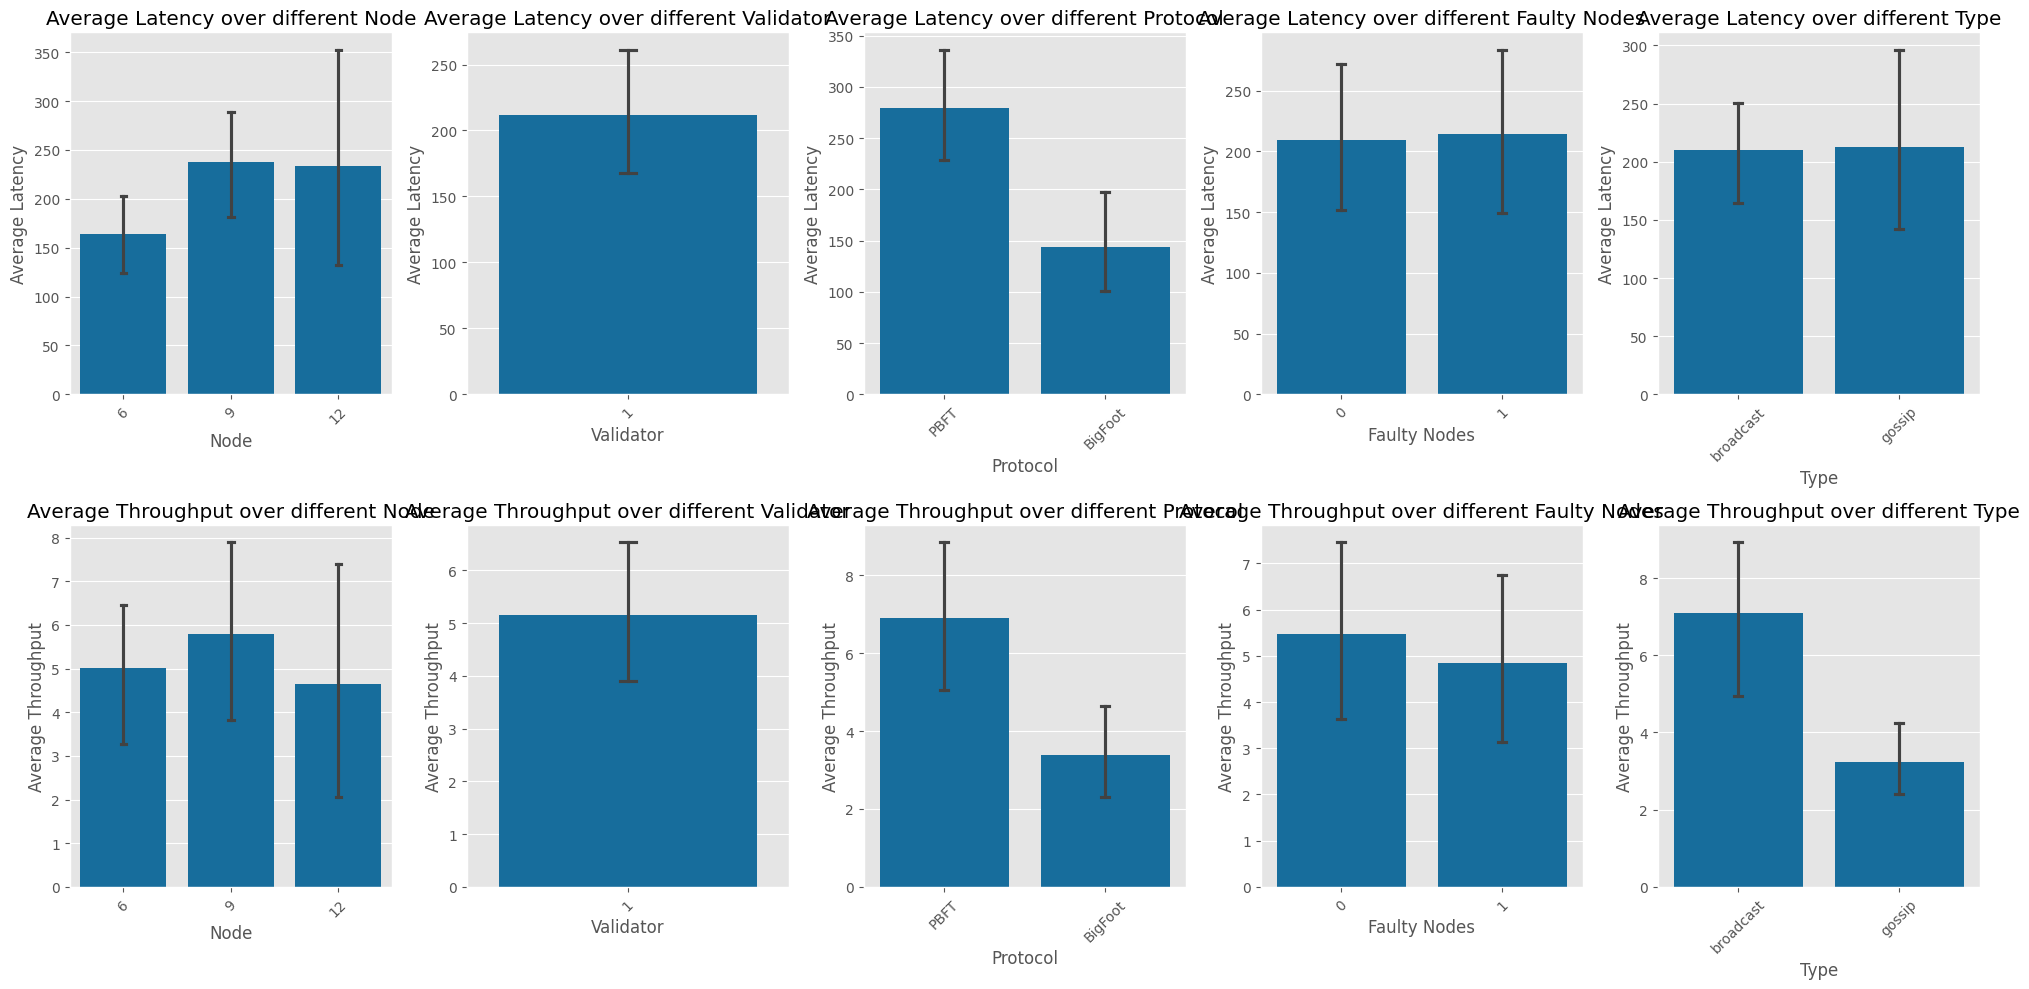

In [24]:
df = pd.DataFrame(results)

def plot_simulation_results(df):
    # Parameters for the x-axis
    x_params = ['Node', 'Validator', 'Protocol', 'Faulty Nodes', 'Type']  # Corrected column names
    # Metrics to plot on the y-axis
    y_metrics = ['Average Latency', 'Average Throughput']
    
    # Set the style of matplotlib to emulate ggsci style
    plt.style.use('ggplot')  # 'ggplot' style has a good scientific look
    sns.set_palette("colorblind")  # Color palette that is colorblind accessible

    # Create subplots
    fig, axs = plt.subplots(len(y_metrics), len(x_params), figsize=(20, 10))

    for i, metric in enumerate(y_metrics):
        for j, param in enumerate(x_params):
            sns.barplot(data=df, x=param, y=metric, ax=axs[i, j], capsize=.05)
            axs[i, j].set_title(f'{metric} over different {param}')
            axs[i, j].set_xlabel(param)
            axs[i, j].set_ylabel(metric)
            for item in axs[i, j].get_xticklabels():
                item.set_rotation(45)  # Rotate x labels for better readability

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Convert the results to a DataFrame with appropriate columns
df = pd.DataFrame(results)
# Make sure to include all parameters and metrics in the DataFrame
expected_columns = ['Node', 'Validator', 'Protocol', 'Type', 'Beta', 'Faulty Nodes', 'Num Byzantine', 
                    'Average Latency', 'Latency Variance', 'Average Throughput', 'Throughput Variance']
assert all(column in df.columns for column in expected_columns), "DataFrame is missing expected columns"

# Call the function to plot the results
plot_simulation_results(df)

ValueError: Could not interpret value `faulty_nodes` for `x`. An entry with this name does not appear in `data`.

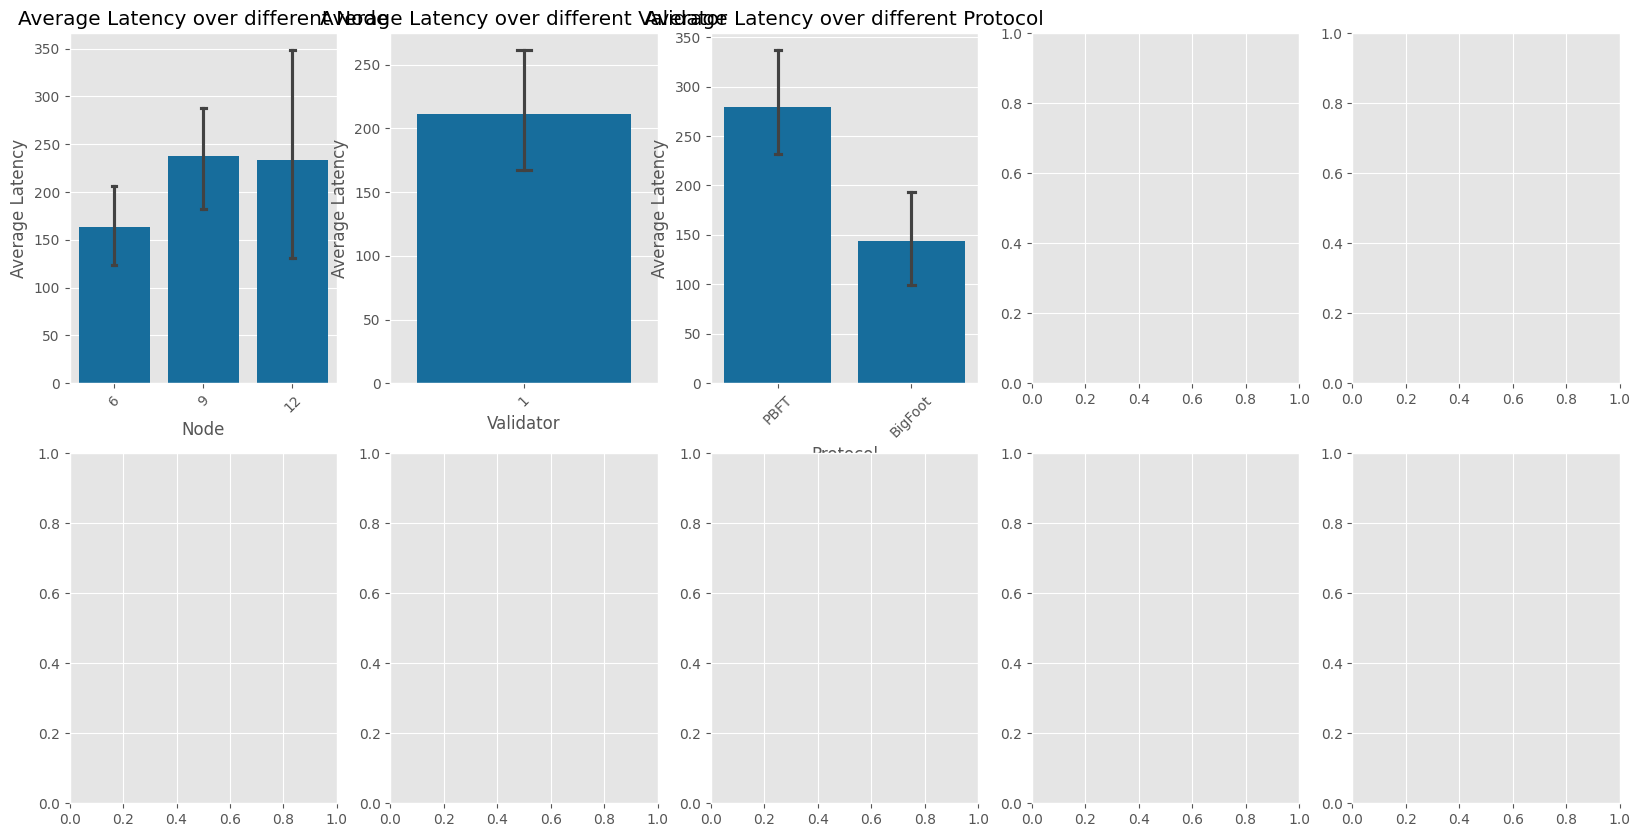

In [25]:
# Convert the results to a DataFrame
df = pd.DataFrame(results)

def plot_simulation_results(df):
    # Parameters for the x-axis
    x_params = ['Node', 'Validator', 'Protocol', 'faulty_nodes', 'type']
    # Metrics to plot on the y-axis
    y_metrics = ['Average Latency', 'Average Throughput']
    
    # Set the style of matplotlib to emulate ggsci style
    plt.style.use('ggplot')  # 'ggplot' style has a good scientific look
    sns.set_palette("colorblind")  # Color palette that is colorblind accessible

    # Create subplots
    fig, axs = plt.subplots(len(y_metrics), len(x_params), figsize=(20, 10))

    for i, metric in enumerate(y_metrics):
        for j, param in enumerate(x_params):
            sns.barplot(data=df, x=param, y=metric, ax=axs[i, j], capsize=.05)
            axs[i, j].set_title(f'{metric} over different {param}')
            axs[i, j].set_xlabel(param)
            axs[i, j].set_ylabel(metric)
            for item in axs[i, j].get_xticklabels():
                item.set_rotation(45)  # Rotate x labels for better readability

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Convert the results to a DataFrame with appropriate columns
df = pd.DataFrame(results)
# Make sure to include all parameters and metrics in the DataFrame
expected_columns = ['Node', 'Validator', 'Protocol', 'Type', 'Beta', 'Faulty Nodes', 'Num Byzantine', 
                    'Average Latency', 'Latency Variance', 'Average Throughput', 'Throughput Variance']
assert all(column in df.columns for column in expected_columns), "DataFrame is missing expected columns"

# Call the function to plot the results
plot_simulation_results(df)